In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sb

In [3]:
digits = load_digits()

In [4]:
X = digits.data
y = digits.target
c = digits.target_names

In [5]:
print(X.shape)
print(y.shape)
print(c.shape)

(1797, 64)
(1797,)
(10,)


In [6]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

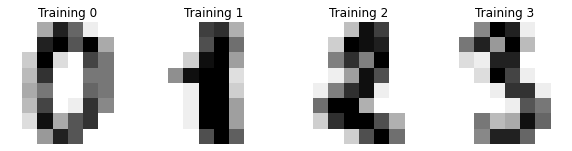

In [7]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation = "nearest")
    ax.set_title("Training %i" %label)

In [8]:
digits.images.shape

(1797, 8, 8)

In [9]:
import sklearn
sklearn.__version__

'1.0.2'

In [32]:
#Create classifier: Support vectorr machine
clf = svm.SVC(gamma = 0.001)
#Create train-test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.5, shuffle = False)

#Learn using Support Vector Machine
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)

In [33]:
#Report
print(f"Classificatio report for classifier {clf}: \n"
     f"{metrics.classification_report(y_test, predicted)} \n")

Classificatio report for classifier SVC(gamma=0.001): 
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899
 



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


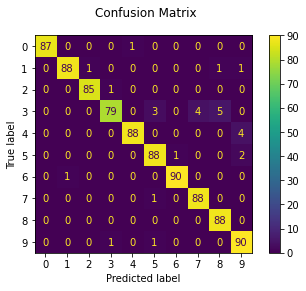

In [34]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()